# 👩‍💻 Activité 4 : Comment entrainer et évaluer un modèle de régression linéaire ?

<img src="https://cdn.pixabay.com/photo/2017/10/04/16/43/table-2816806_960_720.jpg" alt="rubik" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Quelles sont les étapes à réaliser en amont de l'entrainement du modèle de regression linéaire ?
___
Les étapes en amont de l'entrainement d'un modèle de regression linéaire sont :

- **Collecte des données** (API, Scraping, bases de données...)

- **Nettoyage des données** (données manquantes, données aberrantes...)

- **Pré-traitement des données** (normalisation, standardisation...)

- **Augmentation des données** (ingénierie des caractéristiques)

___
### - Quelles sont les métriques d'évaluation d'un modèle de regression linéaire ?
___
Les principales métriques de régression sont :

- **R2** : proportion de la variance expliquée par le modèle de regression linéaire

- **RMSE** : écart quadratique moyen (root mean square error)

- **MAE** : erreur absolue moyenne (mean absolute error)

Source :

- https://scikit-learn.org/stable/modules/classes.html#regression-metrics
___
### - Quelles sont les méthodes de régularisation pour la régression linéaire ?
___
La **régularisation** vise à **réduire le surapprentissage** des modèles de machine learning. Pour la régression linéaire, les méthodes de régularisation cherchent à **contraindre les coefficients** de la régression à être les **plus faibles possibles** suivant différentes normes :

- Avec la norme L1 : régression Lasso

- Avec la norme L2 : régression Ridge

- Avec les norme L1 et L2 : régression Elastic Net

Source : 

- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

- https://scikit-learn.org/stable/modules/linear_model.html#lasso

- https://scikit-learn.org/stable/modules/linear_model.html#elastic-net
___

## ✏️ Activités

Le jeu de données utilisé dans cet exercice a été construit à partir du fichier de ["Demandes de valeurs foncières - DVF"](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/) du **premier semestre 2022**. Les données ont été **nettoyées** et **sélectionnées** pour ne conserver que les ventes d'**appartements** dans le département de l'**isère**.

Fichier source : https://www.data.gouv.fr/fr/datasets/r/87038926-fb31-4959-b2ae-7a24321c599a

<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/8/84/Data_gouv_fr_logo.svg/1280px-Data_gouv_fr_logo.svg.png" alt="datagouv" width="400"/>

Pour éviter la **fuite de données (data leakage)**, il est préférable d'utiliser un [pipeline Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) pour entrainer un modèle de machine learning.

- Importer les bibliothèques suivantes : **Pandas**, **Matplotlib** et **Scikit-Learn** (sklearn.preprocessing.StandardScaler, sklearn.pipeline.Pipeline, sklearn.linear_model.LinearRegression, sklearn.model_selection.train_test_split)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

- Créer un **pipeline** avec un **StandardScaler** et un modèle de **régression linéaire**

In [2]:
linear_regression_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression()),
])

- Importer le fichier de données "data_immo_38_S1_2022.csv" dans un **dataframe Pandas**

In [3]:
df = pd.read_csv("data_immo_38_S1_2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            618 non-null    float64
 1   Nombre pieces principales  618 non-null    float64
 2   Surface reelle bati        618 non-null    float64
 3   lat                        618 non-null    float64
 4   long                       618 non-null    float64
dtypes: float64(5)
memory usage: 24.3 KB


- Séparer la **valeur cible** ("Valeur fonciere") du reste des caractéristiques

In [4]:
X = df.drop("Valeur fonciere", axis=1)
y = df[["Valeur fonciere"]]

- Séparer les données en un jeu de données d'**entrainement** et de **test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

- **Entrainer le pipeline** du modèle de régression linéaire

In [6]:
linear_regression_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

### Evaluation du modèle de regression linéaire

- Evaluer la **qualité de la prédiction** du modèle à l'aide de la métrique de la méthode `score()` (R2)

In [7]:
linear_regression_pipe.score(X_test, y_test)

0.390734227977246

In [8]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regression_pipe, X, y, cv=10, scoring="r2")
print(f"Moyenne de la métrique : {scores.mean()}")
print(f"Ecart-type de la métrique : {scores.std()}")
print(f"Liste des valeurs de la métrique : {scores}")

Moyenne de la métrique : 0.4483535972163364
Ecart-type de la métrique : 0.23659778756147656
Liste des valeurs de la métrique : [ 0.61181486  0.51518284  0.66803605  0.51762091  0.43234013 -0.08870076
  0.08759817  0.63446895  0.56571103  0.53946381]


- Calculer les **métriques** suivantes : [max_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error), [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), [median_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html)

In [10]:
import math
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [11]:
y_pred = linear_regression_pipe.predict(X_test)
print(f"Max error : {max_error(y_test, y_pred)}")
print(f"Mean absolute error : {mean_absolute_error(y_test, y_pred)}")
print(f"Root mean squarred error : {math.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Median absolute error : {median_absolute_error(y_test, y_pred)}")

Max error : 251095.0974708453
Mean absolute error : 51644.815711523304
Root mean squarred error : 70108.27849176741
Median absolute error : 41290.95663850289


- Analyser la **distribution des résidus**

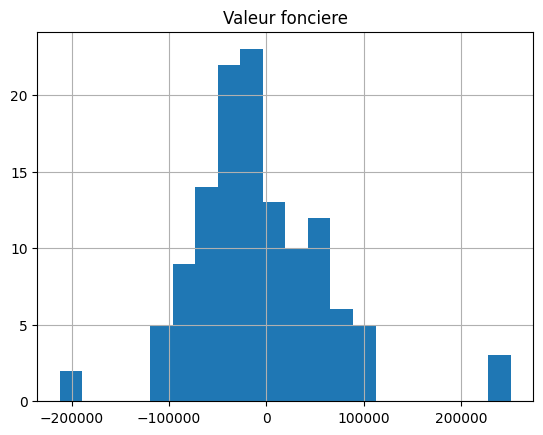

In [12]:
residus = y_test - linear_regression_pipe.predict(X_test)
residus.hist(bins=20)
plt.show()

In [13]:
df.iloc[(residus.abs()>150000).index]

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
312,345000.0,1.0,29.0,45.191743,5.730509
160,69000.0,1.0,28.0,45.182853,5.730358
223,53500.0,1.0,14.0,45.105123,5.875954
429,201600.0,1.0,33.0,45.091147,6.072563
23,65300.0,1.0,16.0,45.180855,5.747203
...,...,...,...,...,...
480,358000.0,4.0,90.0,45.176266,5.729770
9,191400.0,4.0,77.0,45.160668,5.746200
274,242800.0,3.0,67.0,45.241657,5.681689
311,345000.0,1.0,28.0,45.191743,5.730509


In [14]:
df.iloc[residus[(residus.abs()>150000)].dropna().index]

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
312,345000.0,1.0,29.0,45.191743,5.730509
314,345000.0,1.0,25.0,45.191743,5.730509
165,333550.0,6.0,210.0,45.403048,5.608775
378,40000.0,2.0,82.0,45.138708,5.585822
311,345000.0,1.0,28.0,45.191743,5.730509


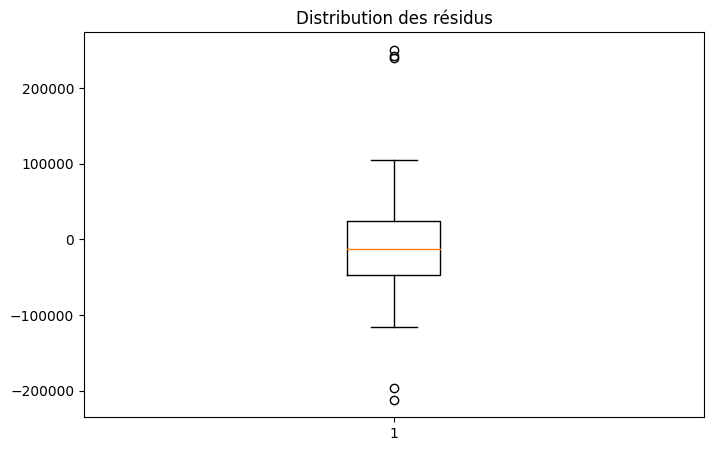

In [15]:
plt.figure(figsize=(8, 5))
plt.boxplot(residus)
plt.title("Distribution des résidus")
plt.show()

### Amélioration de la qualité des données d'entrée

- Ajouter une colonne pour le prix au m2

In [16]:
df["prix au m2"] = df["Valeur fonciere"]/df["Surface reelle bati"]
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long,prix au m2
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,171502.465825,2.533981,57.019417,45.193309,5.753124,3265.855345
std,101785.142629,1.242016,29.091032,0.100137,0.143955,2006.765124
min,1000.000000,0.000000,10.000000,44.740806,4.815098,15.384615
25%,103352.500000,2.000000,35.000000,45.158335,5.697246,2258.300000
50%,152550.000000,2.000000,55.000000,45.185524,5.726515,2944.468599
75%,219542.750000,3.000000,73.000000,45.212316,5.770547,3710.171156
max,825000.000000,7.000000,226.000000,45.563775,6.125753,27500.000000


- Suivant les prix **min** et **max** observés en Isère, supprimer les **données aberrantes**

Source : https://www.consortium-immobilier.fr/prix/isere-38.html

In [17]:
df = df[df["prix au m2"]>800]
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long,prix au m2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,172510.625212,2.529316,56.951140,45.193739,5.753012,3285.584682
std,101334.735973,1.242906,29.164677,0.100173,0.143432,1998.205015
min,19100.000000,0.000000,10.000000,44.740806,4.815098,853.658537
25%,104000.000000,2.000000,35.000000,45.158918,5.697871,2265.837104
50%,153000.000000,2.000000,55.000000,45.185907,5.726565,2963.485017
75%,219912.500000,3.000000,73.000000,45.212767,5.770547,3713.744589
max,825000.000000,7.000000,226.000000,45.563775,6.125753,27500.000000


In [18]:
df = df[df["prix au m2"]<10000]
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long,prix au m2
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,168911.316551,2.555556,57.519071,45.193951,5.752887,3086.982740
std,96381.476592,1.238159,29.114293,0.100998,0.144142,1214.520872
min,19100.000000,0.000000,10.000000,44.740806,4.815098,853.658537
25%,103535.000000,2.000000,36.000000,45.157259,5.697197,2258.866667
50%,152000.000000,2.000000,55.000000,45.185430,5.726345,2942.068966
75%,217250.000000,3.000000,73.000000,45.214675,5.771763,3657.868304
max,825000.000000,7.000000,226.000000,45.563775,6.125753,9269.662921


- Supprimer les appartements avec **0 pièce principale**

In [19]:
df = df[(df["Nombre pieces principales"]>0)]
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long,prix au m2
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,169225.497304,2.564060,57.658902,45.193975,5.752983,3080.743399
std,96380.196602,1.231384,29.059625,0.101166,0.144372,1211.437696
min,19100.000000,1.000000,10.000000,44.740806,4.815098,853.658537
25%,104000.000000,2.000000,36.000000,45.156183,5.697197,2257.733333
50%,152000.000000,2.000000,55.000000,45.185327,5.726345,2936.507937
75%,217500.000000,3.000000,73.000000,45.214808,5.771887,3640.625000
max,825000.000000,7.000000,226.000000,45.563775,6.125753,9269.662921


- Supprimer la colonne "prix au m2" du dataset

In [20]:
df = df.drop("prix au m2", axis=1)

In [21]:
df.describe()

,Valeur fonciere,Nombre pieces principales,Surface reelle bati,lat,long
count,601.000000,601.000000,601.000000,601.000000,601.000000
mean,169225.497304,2.564060,57.658902,45.193975,5.752983
std,96380.196602,1.231384,29.059625,0.101166,0.144372
min,19100.000000,1.000000,10.000000,44.740806,4.815098
25%,104000.000000,2.000000,36.000000,45.156183,5.697197
50%,152000.000000,2.000000,55.000000,45.185327,5.726345
75%,217500.000000,3.000000,73.000000,45.214808,5.771887
max,825000.000000,7.000000,226.000000,45.563775,6.125753


- **Réentrainer** le modèle avec ces données nettoyées et calculer les **métriques**. Analyser la **distribution des résidus**

R2 : 0.3638137742471603
Max error : 229898.11817940336
Mean absolute error : 46251.343073147626
Root mean squarred error : 59491.035296095
Median absolute error : 37605.3437490213
Moyenne de la métrique : 0.5558406477657228
Ecart-type de la métrique : 0.0933771838595326
Liste des valeurs de la métrique : [0.62456312 0.55025436 0.65924899 0.5296314  0.56509518 0.55146186
 0.30694945 0.64919049 0.5719509  0.55006071]


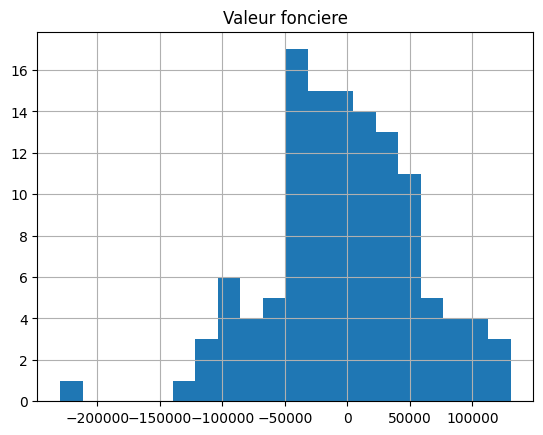

In [22]:
def train_model(df, test_set=True):
    X = df.drop("Valeur fonciere", axis=1)
    y = df[["Valeur fonciere"]]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1)
    linear_regression_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression()),
    ])
    linear_regression_pipe.fit(X_train, y_train)
    if test_set is True:
        X_result = X_test
        y_result = y_test
    else:
        X_result = X_train
        y_result = y_train
        
    r2 = linear_regression_pipe.score(X_result, y_result)
    # Metrics
    print(f"R2 : {r2}")
    print(f"Max error : {max_error(y_result, linear_regression_pipe.predict(X_result))}")
    print(f"Mean absolute error : {mean_absolute_error(y_result, linear_regression_pipe.predict(X_result))}")
    print(f"Root mean squarred error : {math.sqrt(mean_squared_error(y_result, linear_regression_pipe.predict(X_result)))}")
    print(f"Median absolute error : {median_absolute_error(y_result, linear_regression_pipe.predict(X_result))}")
    scores = cross_val_score(linear_regression_pipe, X, y, cv=10, scoring="r2")
    print(f"Moyenne de la métrique : {scores.mean()}")
    print(f"Ecart-type de la métrique : {scores.std()}")
    print(f"Liste des valeurs de la métrique : {scores}")
    # Residus
    residus = y_result - linear_regression_pipe.predict(X_result)
    residus.hist(bins=20)
    plt.show()

train_model(df, test_set=True)

- Le modèle est-il en **surapprentissage (overfitting)** ?

R2 : 0.6066274569035359
Max error : 530209.2275643061
Mean absolute error : 45743.15875069145
Root mean squarred error : 63334.12241818518
Median absolute error : 36874.61780942268
Moyenne de la métrique : 0.5558406477657228
Ecart-type de la métrique : 0.0933771838595326
Liste des valeurs de la métrique : [0.62456312 0.55025436 0.65924899 0.5296314  0.56509518 0.55146186
 0.30694945 0.64919049 0.5719509  0.55006071]


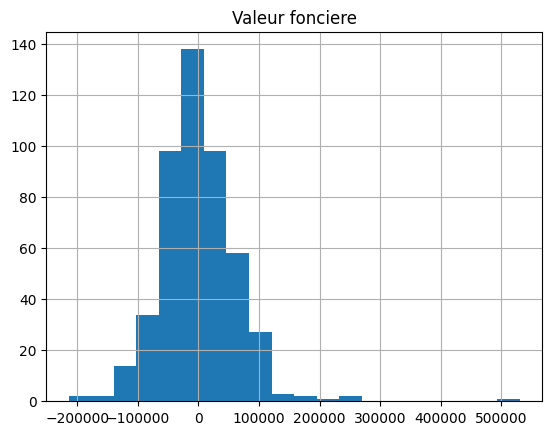

In [23]:
train_model(df, test_set=False)

### Amélioration du modèle

Il existe différentes **méthodes de régularisation** pour **réduire le surapprentissage** : [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) et [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

- Entrainer un modèle de **régression Lasso (Ridge ou ElasticNet)** pour réduire le surapprentissage

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [31]:
def train_model(df, test_set=True):
    X = df.drop("Valeur fonciere", axis=1)
    y = df[["Valeur fonciere"]]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1)
    linear_regression_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('Lasso_regression', Lasso(10000)),
    ])
    linear_regression_pipe.fit(X_train, y_train)
    if test_set is True:
        X_result = X_test
        y_result = y_test
    else:
        X_result = X_train
        y_result = y_train
        
    r2 = linear_regression_pipe.score(X_result, y_result)
    # Metrics
    print(f"R2 : {r2}")
    print(f"Max error : {max_error(y_result, linear_regression_pipe.predict(X_result))}")
    print(f"Mean absolute error : {mean_absolute_error(y_result, linear_regression_pipe.predict(X_result))}")
    print(f"Root mean squarred error : {math.sqrt(mean_squared_error(y_result, linear_regression_pipe.predict(X_result)))}")
    print(f"Median absolute error : {median_absolute_error(y_result, linear_regression_pipe.predict(X_result))}")
    scores = cross_val_score(linear_regression_pipe, X, y, cv=10, scoring="r2")
    print(f"Moyenne de la métrique : {scores.mean()}")
    print(f"Ecart-type de la métrique : {scores.std()}")
    print(f"Liste des valeurs de la métrique : {scores}")
    return linear_regression_pipe

lin_reg = train_model(df, test_set=True)

R2 : 0.4535384486417018
Max error : 189629.64099549298
Mean absolute error : 44411.436522538286
Root mean squarred error : 55136.50090366511
Median absolute error : 37629.604367815744
Moyenne de la métrique : 0.5425629063308688
Ecart-type de la métrique : 0.1244489068889631
Liste des valeurs de la métrique : [0.57268302 0.54819523 0.70872424 0.62181856 0.57244577 0.54438408
 0.21323075 0.61889993 0.55179829 0.47344918]


- **Interpréter l'importance de chaque caractéristique** sur la prédiction du modèle

In [32]:
coef = pd.DataFrame([lin_reg.steps[1][1].coef_], columns=df.columns[1:])
coef

,Nombre pieces principales,Surface reelle bati,lat,long
0,0.0,67061.838159,-0.0,3510.733654


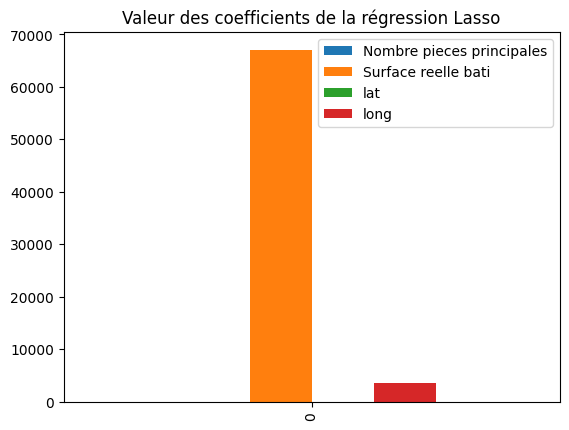

In [33]:
coef.plot.bar()
plt.title("Valeur des coefficients de la régression Lasso")
plt.show()

## 🚀 Pour aller plus loin

- Regularization Part 1: Ridge (L2) Regression : https://www.youtube.com/watch?v=Q81RR3yKn30

- Regularization Part 2: Lasso (L1) Regression : https://www.youtube.com/watch?v=NGf0voTMlcs

- Regularization Part 3: Elastic Net Regression : https://www.youtube.com/watch?v=1dKRdX9bfIo

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source image d'illustration : *Image par tomfield de Pixabay*